In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, models
from tensorflow import one_hot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 as cv

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

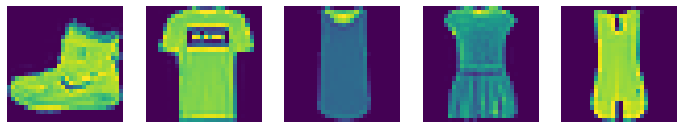

In [5]:
plt.figure(figsize=(12, 6))
for i, image in enumerate(X_train[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(image)
    plt.xlabel(y_train[i])
    plt.axis('off')
plt.show()

In [6]:
## There are 10 category of image 

In [7]:
## Before designing the model let's first convert into 1 chanel of image

X_train = X_train.reshape((-1, X_train[0].shape[0], X_train[0].shape[1], 1))

X_test = X_test.reshape((-1, X_test[0].shape[0], X_test[0].shape[1], 1))

In [8]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [9]:
y_train = one_hot(y_train, 10)
y_test = one_hot(y_test, 10)

In [10]:
y_train.shape, y_test.shape

(TensorShape([60000, 10]), TensorShape([10000, 10]))

In [21]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), input_shape=X_train[0].shape, activation = 'relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    layers.MaxPooling2D((2, 2)),


    layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same'),
    layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same'),
    layers.Dropout(0.3),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu', padding = 'same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding = 'same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding = 'same'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_37 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 conv2d_38 (Conv2D)          (None, 28, 28, 128)       147584    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 conv2d_40 (Conv2D)          (None, 14, 14, 256)       295168    
                                                      

In [22]:
from tensorflow.keras.optimizers import Adam

adam = Adam(learning_rate=0.0001, beta_1 = 0.95)

model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Fitting the data into model
history = model.fit(X_train, y_train, batch_size=64, epochs=30, validation_split = 0.2)

Epoch 1/30
750/750 [==============================] - 37s 48ms/step - loss: 0.5993 - accuracy: 0.7879 - val_loss: 0.7596 - val_accuracy: 0.7280
Epoch 2/30
750/750 [==============================] - 36s 48ms/step - loss: 0.3488 - accuracy: 0.8729 - val_loss: 0.5441 - val_accuracy: 0.8173
Epoch 3/30
750/750 [==============================] - 36s 48ms/step - loss: 0.2835 - accuracy: 0.8969 - val_loss: 0.3551 - val_accuracy: 0.8746
Epoch 4/30
750/750 [==============================] - 36s 48ms/step - loss: 0.2431 - accuracy: 0.9111 - val_loss: 0.3936 - val_accuracy: 0.8687
Epoch 5/30
750/750 [==============================] - 36s 48ms/step - loss: 0.2144 - accuracy: 0.9224 - val_loss: 0.3393 - val_accuracy: 0.8916
Epoch 6/30
750/750 [==============================] - 36s 48ms/step - loss: 0.1899 - accuracy: 0.9296 - val_loss: 0.3123 - val_accuracy: 0.9028
Epoch 7/30
750/750 [==============================] - 36s 48ms/step - loss: 0.1732 - accuracy: 0.9366 - val_loss: 0.2628 - val_accuracy:

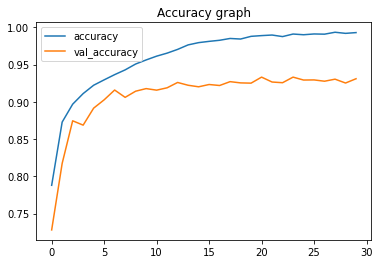

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title("Accuracy graph")
plt.show()

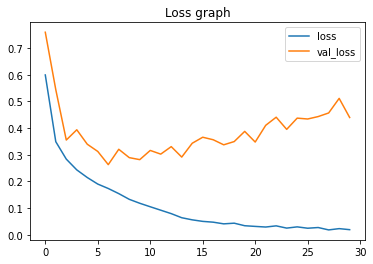

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title("Loss graph")
plt.show()